# Compositing images of timelapse
* See timelapse script for more details

In [1]:
from PIL import Image
import numpy as np
import os, sys
from PIL import Image, ImageOps

In [148]:
def thresh(x): #zero threshold for cropping around sun
    if x < 250:
        x = 0
    return x

def bbcrop(image,size):
    
    box1 = image.point(thresh).getbbox()
    
    width = 512
    height = 512
    left = box1[0]
    top = box1[3]
    box2 = (left, top - height, left + width, top)
        
    left = box2[0]-(size[0]-width)/2
    top = box2[1]-(size[1]-height)/2
    box3 = (left, top , left + size[0] , top + size[1])
    
    return image.crop(box3)

In [238]:
# Image list - must be odd number
image_list = ["IMG_7010.jpg",
              "IMG_7410.jpg",
              "IMG_7710.jpg",
              "IMG_7810.jpg",
              "IMG_7915 - ramped.jpg",
              "IMG_7990.jpg",
              "IMG_8090.jpg",
              "IMG_8390.jpg",
              "IMG_8790.jpg"] 
directory = "/Users/timothysennott/Desktop/Eclipse/EOS-working/CROP_TEST_1920_FINAL leveled/"

In [239]:
height = 800
width = 800
num_images = len(image_list)
full_height = (num_images + 2) * height
full_width = (num_images + 2) * 2 * width

done, index:  4, image: IMG_7010.jpg
done, index:  3, image: IMG_7410.jpg
done, index:  2, image: IMG_7710.jpg
done, index:  1, image: IMG_7810.jpg
done, index:  0, image: IMG_7915 - ramped.jpg
done, index: -1, image: IMG_7990.jpg
done, index: -2, image: IMG_8090.jpg
done, index: -3, image: IMG_8390.jpg
done, index: -4, image: IMG_8790.jpg


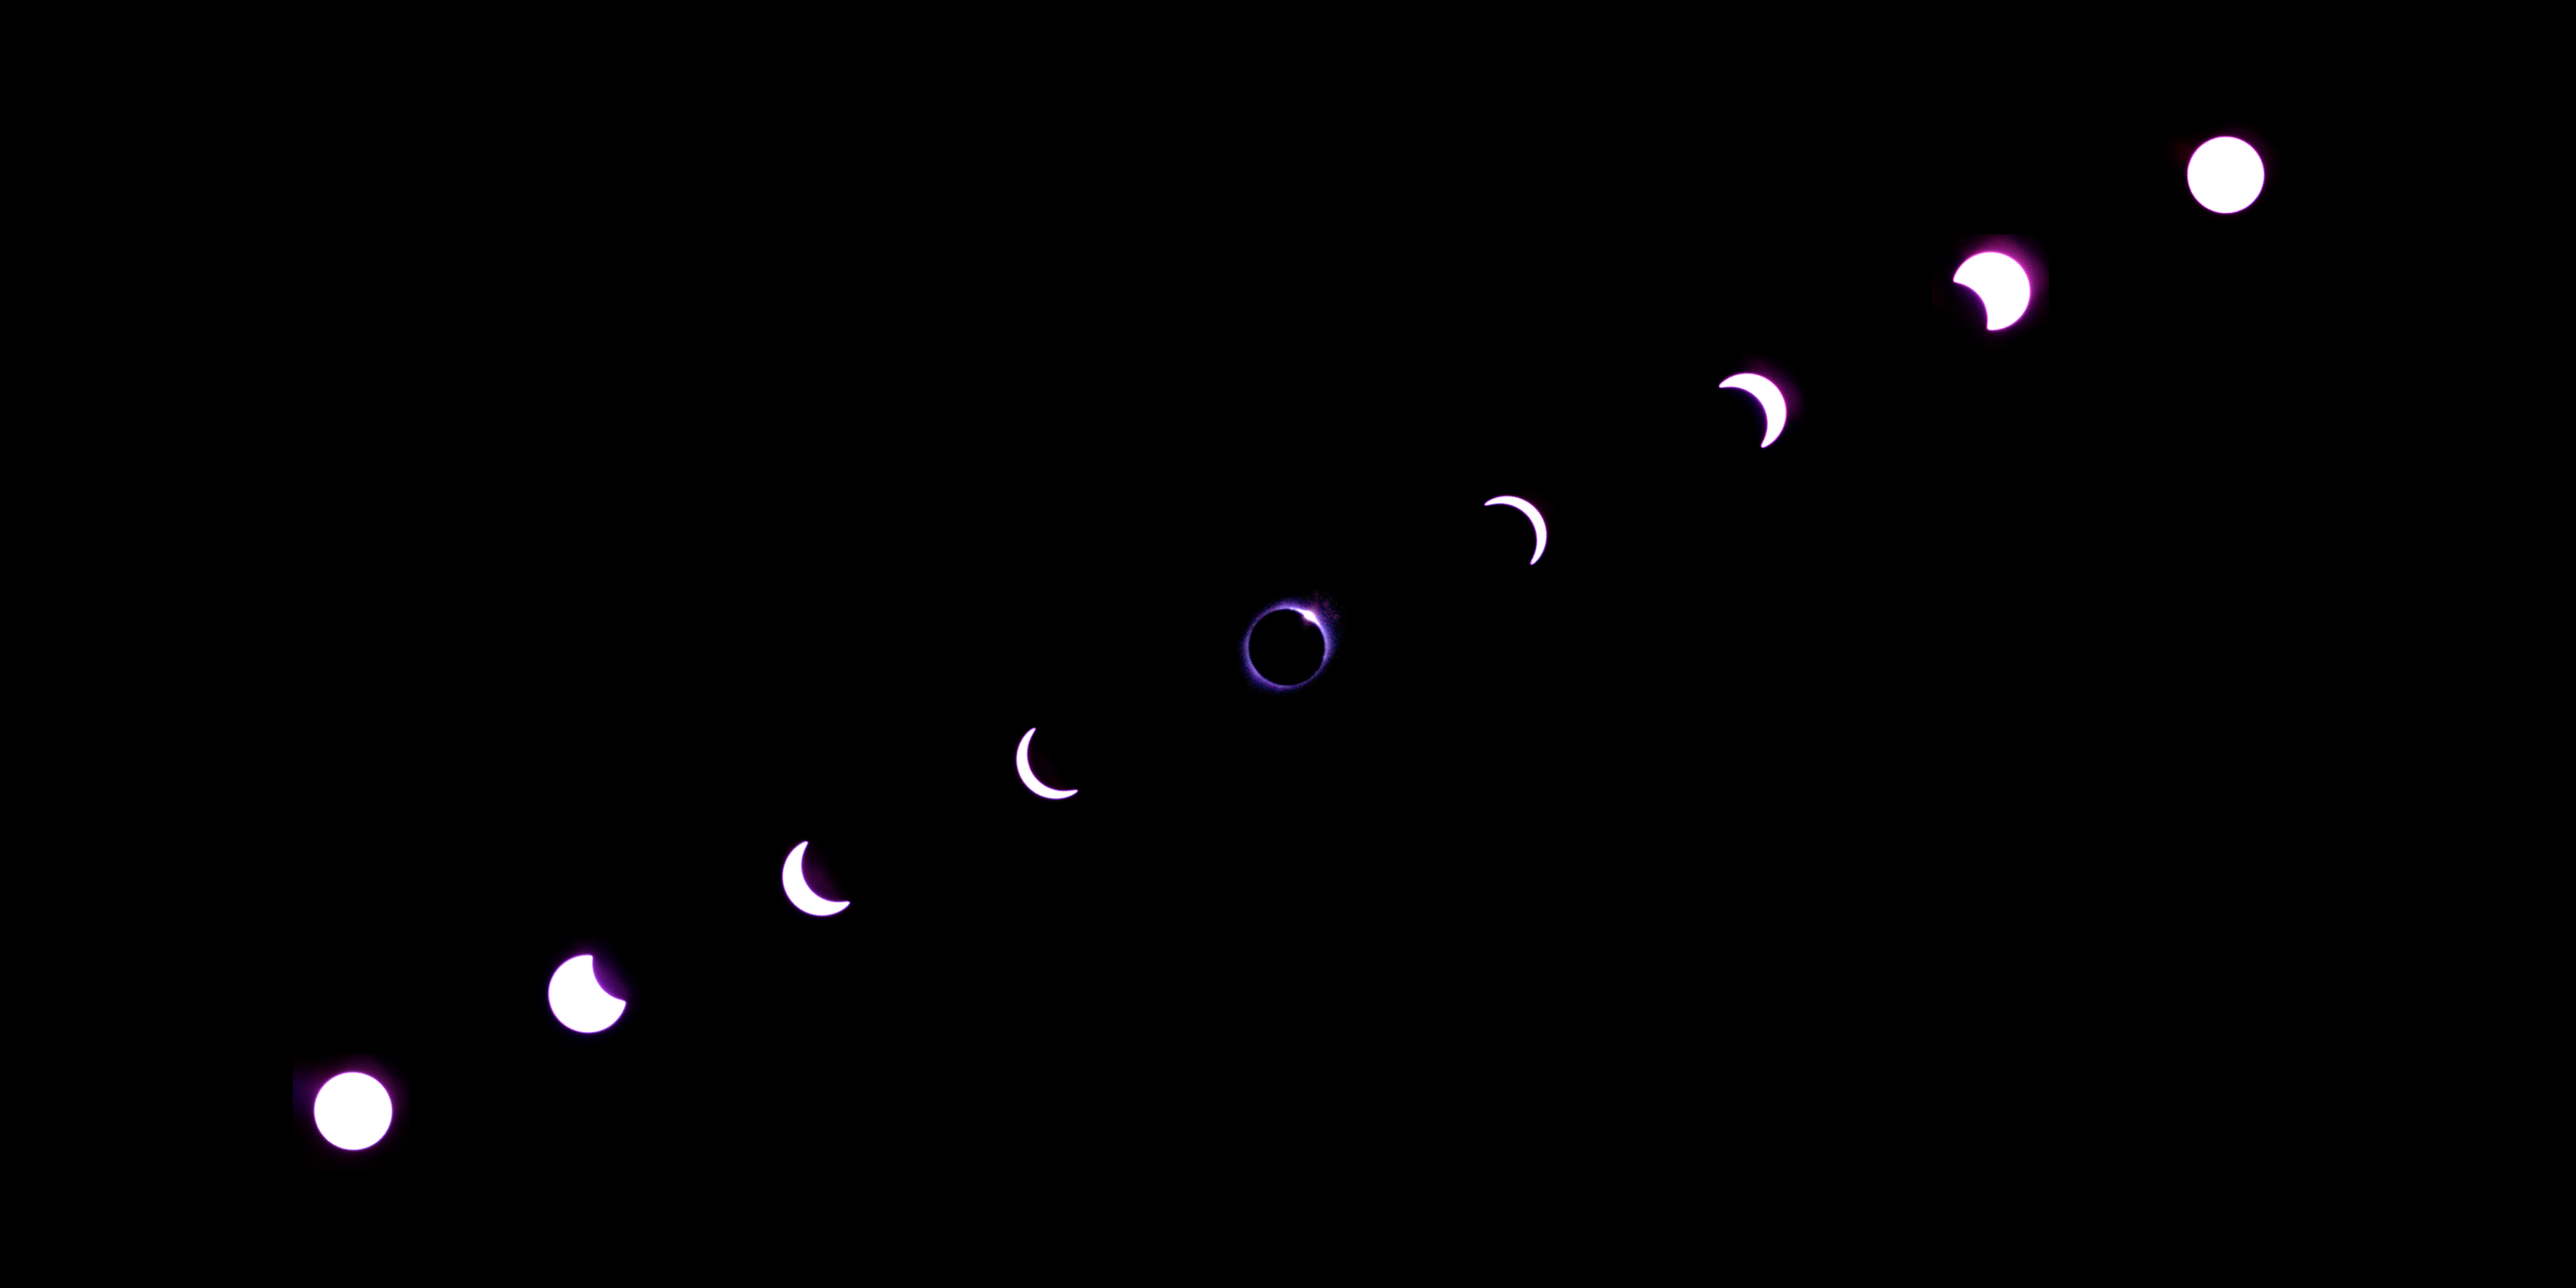

In [246]:
image = Image.new(color="black", mode = 'RGB', size=[full_width,full_height])

for i in range(0, len(image_list)):
    
    j = len(image_list)/2 - i
    
    target = Image.open(directory + image_list[i])
    target = target.rotate(-12)
    
    if j== 0: target = target.rotate(180)
    cropped = bbcrop(target, [width, height])
    if j== 0: cropped = cropped.rotate(180)
        
    left = full_width/2 - width/2 - 2* width*j
    top = full_height - full_height/2 - height/2 + height*j
    image.paste(cropped,[left, top, left+width, top+width])

    print("done, index: %2d, image: %s" %(j, image_list[i]))
    
image = image.resize([int(dim*0.25) for dim in image.size])
image.save("Eclipse_Composite.jpg")
image
